1.题目:

给定一个二维数据集，使用kmeans进行聚类。

数据集：data/ex7data2.mat

## 1.导入数据集

1.导入库

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

2.导入数据集

In [2]:
data1 = sio.loadmat('./data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data1['X']
X.shape

(300, 2)

3.绘制数据的图

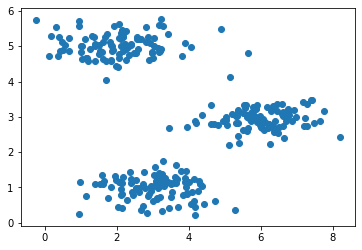

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## 2.K-means算法(标准算法）

#### 1.获取样本点所属类别

计算每个样本点与聚类中心的距离：
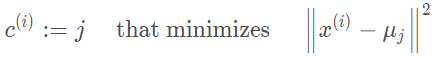

In [5]:
def find_centroids(X,centros):
    
    idx = []       #存放样本所属类别索引，即 0，1，2 
    
    for i in range(len(X)):
        # (2,) (k,2) -> (k,2)
        dist =np.linalg.norm((X[i] - centros),axis=1) #(k,) # 每个样本点与聚类中心计算距离（axis=1表示按列计算）
        id_i = np.argmin(dist)                              # 距离排序，取最小距离在数组中的索引号（0，1，2），即将样本点分给对应聚类中心
        idx.append(id_i)
        
    return np.array(idx)                                    # 返回值为每个样本点的所属类别索引

In [7]:
centros = np.array([[3, 3], [6, 2], [8, 5]])   # 人为给定（随机初始化）3个初始聚类中心
idx = find_centroids(X,centros)                # 每个样本点都找到所属类别
idx[:3]

array([0, 2, 1], dtype=int64)

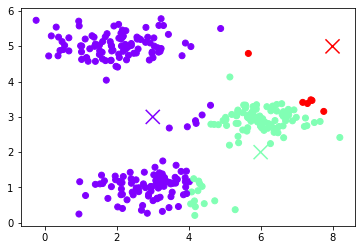

In [10]:
#绘制首次聚类结果
plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')#数据集根据索引idx来区分颜色
plt.scatter(init_centros[:,0],init_centros[:,1],s=200,marker='x',c=[0,1,2],cmap='rainbow')#末尾参数表示符号大小，形状，颜色
plt.show()

#### 2.计算重心点

In [11]:
def compute_centros(X,idx,k):
    
    centros = []             # 用于存放聚类中心
    
    for i in range(k):
        centros_i = np.mean(X[idx == i],axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

In [12]:
# # 三个聚类中心由初始给定值 变成 当前的平均值
centros = compute_centros(X,idx,k=3)

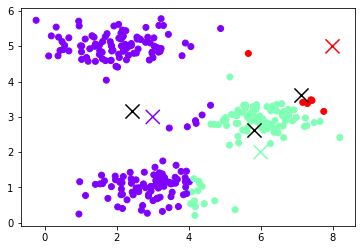

In [14]:
# 画出图像
plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')#数据集根据索引idx来区分颜色
plt.scatter(init_centros[:,0],init_centros[:,1],s=200,marker='x',c=[0,1,2],cmap='rainbow')#初始聚类中心
plt.scatter(centros[:,0],centros[:,1],s=200,marker='x',c='k')# 新的聚类中心
plt.show()

#### 3.运行kmeans，重复执行1和2

In [15]:
def run_kmeans(X,centros,iters):
    
    
    k = len(centros)
    centros_all = []
    centros_all.append(centros)                 # 记录初始聚类中心
    centros_i = centros                         # 初始聚类中心
    for i in range(iters):
        idx = find_centroids(X,centros_i)       # 获取样本点所属类别
        centros_i = compute_centros(X,idx,k)    # 更新聚类中心
        centros_all.append(centros_i)           # 记录聚类中心
        
    return idx,np.array(centros_all)

#### 4.绘制数据集聚类结果&聚类中心的移动轨迹

In [16]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')         #数据集根据索引idx来区分颜色
    
    # centros_all是3维数组，三个维度分别是迭代次数，类别索引，特征
    plt.plot(centros_all[:,:,0],     #横轴
             centros_all[:,:,1],     #纵轴
             'kx--')                 # k表示黑色，x表示聚类中心，--表示连接线

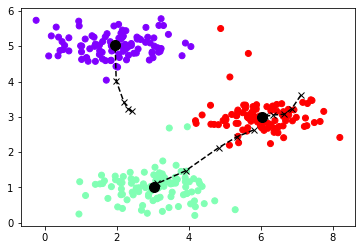

In [20]:
idx,centros_all = run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)
plt.scatter(centros_all[10,:,0],centros_all[10,:,1],s=100,marker='o',c='k')#最终的聚类中心
plt.show()

## 3.观察初始聚类点的位置对聚类效果的影响

In [21]:
# 在训练样本 X-中随机选取 k个样本作为初始聚类中心
def init_centros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [22]:
init_centros(X,k=3)

array([[4.30471138, 1.10725995],
       [6.23228878, 2.72850902],
       [4.13835915, 1.24780979]])

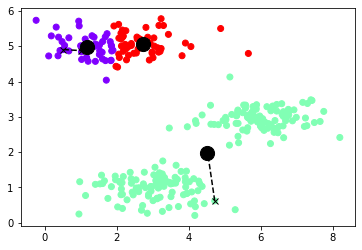

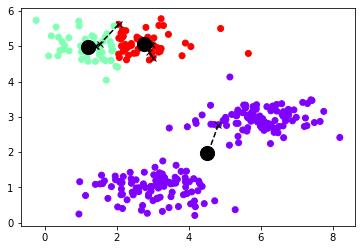

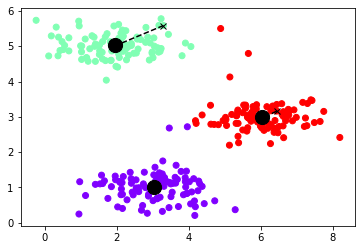

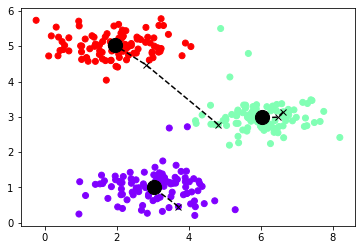

In [24]:
for i in range(4):
    idx,centros_all = run_kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)
    plt.scatter(centros_all[10,:,0],centros_all[10,:,1],s=200,marker='o',c='k')#最终的聚类中心

2.题目：

使用 k-means 压缩图像

原始图像：24位真彩色图像，每个像素有RGB三个通道，每个通道有256个强度值。

压缩目标：将每个像素通道的强度值压缩为16种。

通俗的讲，原图像每个像素点的单个通道有256种颜色可供选择，而我们要用K-means算法选16种颜色，用于图片压缩。把原始图片的每个像素看作一个数据样本，然后利用K-means算法去找分组最好的16种颜色。

In [25]:
data = sio.loadmat('data/bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [26]:
A = data['A']
A.shape

(128, 128, 3)

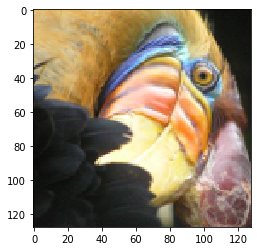

In [28]:
# 原始图像
from skimage import io
image = io.imread('data/bird_small.png')
plt.imshow(image)
plt.show()

In [30]:
# 特征归一化
A = A / 255
A = A.reshape(-1,3) #将A转换为二维数组，且列数为3
A.shape # 128*128=16348行（像素点数），3列（通道数）

(16384, 3)

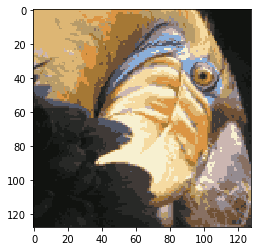

In [32]:
k = 16
idx,centros_all = run_kmeans(A,init_centros(A,k=16),iters=20)  # 获取原始数据的16个聚类中心
centros = centros_all[-1]                # 最后的聚类中心

im = np.zeros(A.shape)

for i in range(k):
    im[idx==i] = centros[i]             # 使同一类点全都相等于聚类中心点
im = im.reshape(128,128,3)              # 将聚类后的数据重构为图像格式
plt.imshow(im)
plt.show()